<a href="https://colab.research.google.com/github/frdnprstyo/Tugas---Tugas-PEMROGRAMAN-PYTHON/blob/master/pertemuan13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f=1800 #MHz
loc='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
print (d)

[571 491 339 290 250 576 278 390 495 436 436 653 272 211 208 304 545 280
 446 664 223 335 467 401 594 515 267 391 644 407 347 434 397 410 589 370
 463 467 572 299 639 699 512 468 610 202 683 323 398 437 559 257 218 357
 381 331 296 231 286 680 378 270 518 273 482 262 482 574 596 518 334 509
 355 436 538 267 615 214 636 291 250 550 437 492 366 223 286 384 543 495
 676 215 644 587 667 570 378 462 223 625 475 453 421 537 233 315 573 544
 269 402 282 443 597 368 476 294 366 692 514 604 294 204 457 467 430 248
 286 561 549 611 560 549 282 371 403 266 398 561 451 385 636 556 273 213
 638 624 210 250 286 697 475 440 616 316 486 257 531 319 307 639 663 439
 667 585 482 401 496 314 241 614 345 645 282 202 506 259 290 502 318 622
 219 318 261 683 556 595 478 387 517 202 273 653 331 467 231 538 498 317
 516 699]


In [5]:
LpUrban=cos(f,loc,tower,user,d)
LpSuburban=cos(f,loc2,tower,user,d)
LpOpen=cos(f,loc3,tower,user,d)

In [6]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

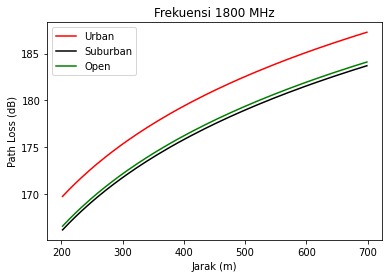

In [7]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='Urban')
plt.plot(d_sort,Suburban_sort,'k-', label='Suburban')
plt.plot(d_sort,Open_sort,'g-', label='Open')
plt.legend()
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [8]:
f=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)


In [9]:
LpUrban=cos(f,loc,tower,user,d)
LpUrban2=cos(f2,loc,tower,user,d)
LpUrban3=cos(f3,loc,tower,user,d)

In [10]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

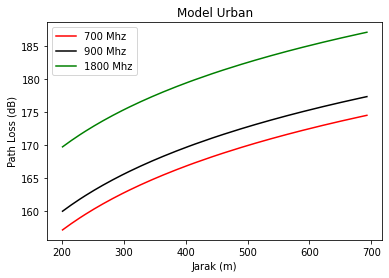

In [11]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='700 Mhz')
plt.plot(d_sort,Urban2_sort,'k-', label='900 Mhz')
plt.plot(d_sort,Urban3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()